## Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [53]:
uber=pd.read_csv('UberDataset.csv')
uber.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


## Data Cleaning

In [54]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [55]:
uber.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


### Checking for missing values


In [56]:
uber.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

### Checking for duplicate values


In [57]:
uber.duplicated().sum()

np.int64(1)

In [58]:
uber[uber.duplicated()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


### Checking for unique values


In [59]:
uber.nunique()

START_DATE    1155
END_DATE      1154
CATEGORY         2
START          177
STOP           188
MILES          257
PURPOSE         10
dtype: int64

### solve the problem of missing values


In [60]:
uber['PURPOSE'].value_counts()

PURPOSE
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: count, dtype: int64

In [61]:
#uber['PURPOSE'].ffill(inplace=True)
uber['PURPOSE'] = uber['PURPOSE'].ffill()

In [62]:
# uber['END_DATE'].ffill(inplace=True)
# uber['CATEGORY'].ffill(inplace=True)
# uber['START'].ffill(inplace=True)
# uber['STOP'].ffill(inplace=True)

uber['END_DATE'] = uber['END_DATE'].ffill()
uber['CATEGORY'] = uber['CATEGORY'].ffill()
uber['START'] = uber['START'].ffill()
uber['STOP'] = uber['STOP'].ffill()

In [63]:
uber.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

## Solving Problem of Duplicate Value

In [64]:
uber.drop_duplicates(inplace=True)

In [65]:
uber[uber.duplicated()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE


## Solve start date,end date and time converting to datetime

In [66]:
uber['START_DATE'] = pd.to_datetime(uber['START_DATE'],errors='coerce')  #If a value can't be converted to a valid date/time,it will be replaced with NaT (Not a Time) 
uber['END_DATE'] = pd.to_datetime(uber['END_DATE'],errors='coerce')

In [67]:
uber.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit


### seperate the date and time and month and year


In [68]:
# seperate the date and time and month and year
uber['start_date'] = uber['START_DATE'].dt.date
uber['start_time'] = uber['START_DATE'].dt.time
uber['end_date'] = uber['END_DATE'].dt.date
uber['end_time'] = uber['END_DATE'].dt.time
uber['month'] = uber['START_DATE'].dt.month
uber['year'] = uber['START_DATE'].dt.year


In [69]:
uber.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,start_date,start_time,end_date,end_time,month,year
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21:11:00,2016-01-01,21:17:00,1.0,2016.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,2016-01-02,01:25:00,2016-01-02,01:37:00,1.0,2016.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20:25:00,2016-01-02,20:38:00,1.0,2016.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17:31:00,2016-01-05,17:45:00,1.0,2016.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14:42:00,2016-01-06,15:49:00,1.0,2016.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06,17:15:00,2016-01-06,17:19:00,1.0,2016.0
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,2016-01-06,17:30:00,2016-01-06,17:35:00,1.0,2016.0
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,2016-01-07,13:27:00,2016-01-07,13:33:00,1.0,2016.0
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting,2016-01-10,08:05:00,2016-01-10,08:25:00,1.0,2016.0
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,2016-01-10,12:17:00,2016-01-10,12:44:00,1.0,2016.0


### remove START_DATE END_DATE and rearrange the columns


In [70]:
uber.drop(['START_DATE','END_DATE'],axis=1,inplace=True)
uber = uber[['start_date','start_time','end_date','end_time','month','year','CATEGORY','START','STOP','MILES','PURPOSE']]

In [71]:
uber.month.value_counts()

month
11.0    63
8.0     43
3.0     42
6.0     42
7.0     41
2.0     40
12.0    39
5.0     26
4.0     25
10.0    24
1.0     23
9.0     13
Name: count, dtype: int64

In [72]:
uber.month.isnull().sum()

np.int64(734)

### convert month to integer


In [73]:
# uber.month.fillna(fill,inplace=True)
uber['month'] = uber['month'].fillna(uber['month'].mode()[0])
uber['month'] = uber['month'].astype(int)


In [74]:
uber.head(10)

,start_date,start_time,end_date,end_time,month,year,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01,21:11:00,2016-01-01,21:17:00,1,2016.0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02,01:25:00,2016-01-02,01:37:00,1,2016.0,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02,20:25:00,2016-01-02,20:38:00,1,2016.0,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05,17:31:00,2016-01-05,17:45:00,1,2016.0,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06,14:42:00,2016-01-06,15:49:00,1,2016.0,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06,17:15:00,2016-01-06,17:19:00,1,2016.0,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,2016-01-06,17:30:00,2016-01-06,17:35:00,1,2016.0,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,2016-01-07,13:27:00,2016-01-07,13:33:00,1,2016.0,Business,Cary,Cary,0.8,Meeting
8,2016-01-10,08:05:00,2016-01-10,08:25:00,1,2016.0,Business,Cary,Morrisville,8.3,Meeting
9,2016-01-10,12:17:00,2016-01-10,12:44:00,1,2016.0,Business,Jamaica,New York,16.5,Customer Visit


In [75]:
uber.month.count()

np.int64(1155)

In [76]:
uber.month.value_counts()

month
11    797
8      43
6      42
3      42
7      41
2      40
12     39
5      26
4      25
10     24
1      23
9      13
Name: count, dtype: int64

### convert year to integer


In [77]:
uber['year'] = uber['year'].fillna(uber['year'].mode()[0])
uber['year'] = uber['year'].astype(int)

In [78]:
uber.head()

,start_date,start_time,end_date,end_time,month,year,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01,21:11:00,2016-01-01,21:17:00,1,2016,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02,01:25:00,2016-01-02,01:37:00,1,2016,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02,20:25:00,2016-01-02,20:38:00,1,2016,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05,17:31:00,2016-01-05,17:45:00,1,2016,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06,14:42:00,2016-01-06,15:49:00,1,2016,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [79]:
# convert start_time and end_time to hours and minutes
uber['start_hour'] = uber['start_time'].apply(lambda x: x.hour)
uber['start_minute'] = uber['start_time'].apply(lambda x: x.minute)
uber['end_hour'] = uber['end_time'].apply(lambda x: x.hour)
uber['end_minute'] = uber['end_time'].apply(lambda x: x.minute)

In [80]:
# rearrange the columns and drop start_time and end_time columns
uber = uber[['start_date','start_hour','start_minute','end_date','end_hour','end_minute','month','year','CATEGORY','START','STOP','MILES','PURPOSE']]


In [81]:
# create a new column for duration of the trip to be in minutes
uber['duration'] = uber['end_hour']*60 + uber['end_minute'] - (uber['start_hour']*60 + uber['start_minute'])

In [82]:
# convert miles to km
uber['MILES'] = uber['MILES']*1.60934
#calculate speed
uber['speed'] = uber['MILES']/(uber['duration']/60)

In [83]:
uber.head(5)

,start_date,start_hour,start_minute,end_date,end_hour,end_minute,month,year,CATEGORY,START,STOP,MILES,PURPOSE,duration,speed
0,2016-01-01,21.0,11.0,2016-01-01,21.0,17.0,1,2016,Business,Fort Pierce,Fort Pierce,8.207634,Meal/Entertain,6.0,82.076340
1,2016-01-02,1.0,25.0,2016-01-02,1.0,37.0,1,2016,Business,Fort Pierce,Fort Pierce,8.046700,Meal/Entertain,12.0,40.233500
2,2016-01-02,20.0,25.0,2016-01-02,20.0,38.0,1,2016,Business,Fort Pierce,Fort Pierce,7.724832,Errand/Supplies,13.0,35.653071
3,2016-01-05,17.0,31.0,2016-01-05,17.0,45.0,1,2016,Business,Fort Pierce,Fort Pierce,7.563898,Meeting,14.0,32.416706
4,2016-01-06,14.0,42.0,2016-01-06,15.0,49.0,1,2016,Business,Fort Pierce,West Palm Beach,102.514958,Customer Visit,67.0,91.804440


In [84]:
uber.describe()

C:\Users\91983\AppData\Roaming\Python\Python312\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,start_hour,start_minute,end_hour,end_minute,month,year,MILES,duration,speed
count,421.000000,421.000000,420.000000,420.000000,1155.000000,1155.0,1155.000000,420.000000,420.000000
mean,14.988124,29.741093,14.857143,28.311905,9.466667,2016.0,33.997482,-8.102381,inf
std,4.668777,17.446843,4.957920,17.673662,2.926226,0.0,578.484501,195.917306,NaN
min,0.000000,0.000000,0.000000,0.000000,1.000000,2016.0,0.804670,-1432.000000,-10.720661
25%,12.000000,15.000000,12.000000,13.000000,9.000000,2016.0,4.667086,9.000000,24.098479
50%,15.000000,30.000000,15.000000,27.000000,11.000000,2016.0,9.656040,15.000000,33.357229
75%,18.000000,46.000000,18.000000,44.000000,11.000000,2016.0,16.737136,22.000000,45.312979
max,23.000000,59.000000,23.000000,59.000000,12.000000,2016.0,19641.511898,178.000000,inf


## found problem in speed that have negative value

In [85]:
uber[uber['speed'] < 0]

,start_date,start_hour,start_minute,end_date,end_hour,end_minute,month,year,CATEGORY,START,STOP,MILES,PURPOSE,duration,speed
298,2016-04-02,23.0,11.0,2016-04-03,1.0,34.0,4,2016,Business,Ridgeland,Florence,231.744960,Meeting,-1297.0,-10.720661
357,2016-05-05,23.0,55.0,2016-05-06,0.0,8.0,5,2016,Business,Bellevue,Seattle,20.760486,Meeting,-1427.0,-0.872901
406,2016-06-05,23.0,52.0,2016-06-06,0.0,8.0,6,2016,Business,Durham,Cary,15.932466,Meeting,-1424.0,-0.671312
414,2016-06-07,23.0,41.0,2016-06-08,0.0,4.0,6,2016,Business,Durham,Cary,15.932466,Meeting,-1417.0,-0.674628
425,2016-06-10,23.0,53.0,2016-06-11,0.0,1.0,6,2016,Business,Durham,Cary,15.932466,Meeting,-1432.0,-0.667561
430,2016-06-11,23.0,39.0,2016-06-12,0.0,5.0,6,2016,Business,Durham,Cary,15.932466,Meeting,-1414.0,-0.676059
504,2016-07-01,23.0,48.0,2016-07-02,0.0,9.0,7,2016,Business,Durham,Cary,15.932466,Meeting,-1419.0,-0.673677
506,2016-07-02,23.0,48.0,2016-07-03,0.0,12.0,7,2016,Business,Durham,Cary,15.932466,Meeting,-1416.0,-0.675104


In [86]:
uber['speed'].lt(0).sum()

np.int64(8)

In [87]:
uber = uber[uber['speed'] >= 0]

In [88]:
print("Negative speed count:", uber['speed'].lt(0).sum())  # Should be 0

Negative speed count: 0


In [89]:
uber.speed.min()

np.float64(10.192486666666667)

### Visualizing the data

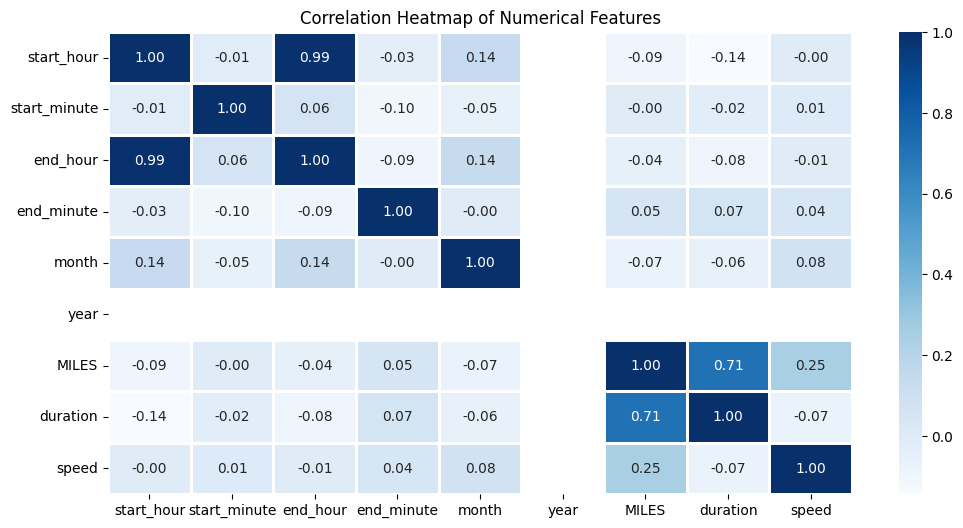

In [90]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    uber.select_dtypes(include=['number']).corr(),
    cmap='Blues',
    fmt='.2f',
    linewidths=2,
    annot=True
)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [91]:
uber['year'].value_counts(dropna=False)

year
2016    412
Name: count, dtype: int64

It means that all 412 records in the dataset have year = 2016, and no other year is present. Its variance is zero, so:

- Correlation with any other column is mathematically undefined

- pandas returns NaN for all correlations involving year

- It won't show meaningful results in your correlation heatmap

So, We can drop it for correlation

In [92]:
uber.drop(columns=['year'], inplace=True)

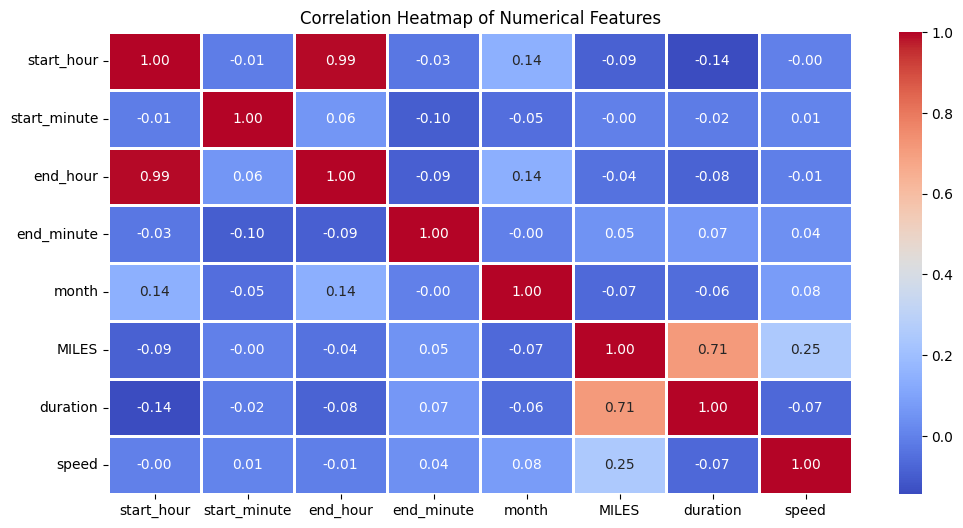

In [93]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    uber.select_dtypes(include=['number']).corr(),
    cmap='coolwarm',
    fmt='.2f',
    linewidths=2,
    annot=True
)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## Correlation Heatmap Insights

This heatmap visualizes the Pearson correlation coefficients between all numerical features in the Uber dataset.

####  Strong Positive Correlations:
- **`start_hour` ↔ `end_hour`** → `0.99`: Very strong positive correlation, which makes sense as most rides start and end within the same hour block.
- **`MILES` ↔ `duration`** → `0.71`: Longer distances generally take more time, showing a strong linear relationship.

####  Moderate Correlations:
- **`MILES` ↔ `speed`** → `0.25`: Weak-to-moderate positive correlation; higher speeds may be associated with longer routes (like highways).

####  Weak or No Correlation:
- Most time-related minute columns (`start_minute`, `end_minute`) and `month` show very low or no correlation with `speed`, `duration`, or `MILES`.
- **`duration` ↔ `speed`** → `–0.07`: Slight negative correlation — longer durations may happen in traffic conditions with lower speed.

####  Column Exclusions:
- **`year` was dropped** from this analysis because it had no variance (all values were `2016`), which results in undefined correlation values.

#### Conclusion:
The features `MILES`, `duration`, and `speed` carry meaningful information for further modeling or visualization. `start_hour` and `end_hour` may also be valuable for time-based analysis. Columns like `start_minute`, `end_minute`, and `month` have limited correlation impact.

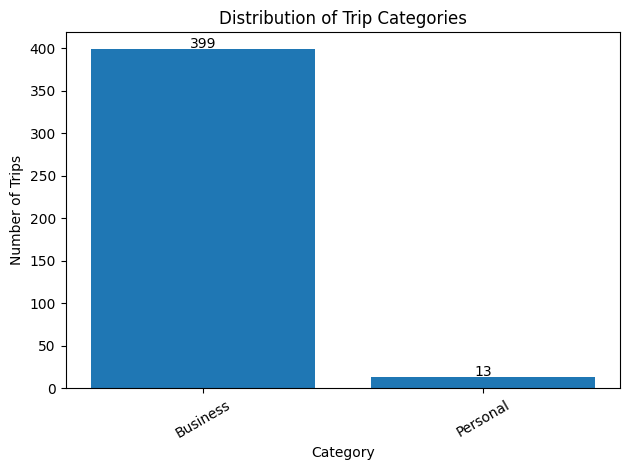

In [94]:
# Count the occurrences of each category / meaningful bar chart that shows the distribution of ride categories
category_counts = uber['CATEGORY'].value_counts()

# Create a bar plot
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Category')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trip Categories')
plt.xticks(rotation=30)

for i, value in enumerate(category_counts.values):
    plt.text(i, value + 1, str(value), ha='center')

plt.tight_layout()
plt.show()

## Distribution of Trip Categories

The bar chart shows the frequency of each trip category recorded in the Uber dataset.

#### Observations:
- **Business trips dominate the dataset**, accounting for **399 out of 412 trips** (~96.8%).
- **Personal trips are significantly fewer**, with only **13 trips** (~3.2%).

### Key Insights:
- The data is highly **imbalanced** toward business-related rides.
- This suggests the dataset may represent **corporate or professional Uber usage**, possibly tied to employee travel.
- For modeling or analytics (like classification), **category imbalance** should be considered (e.g., use stratified sampling or resampling techniques).

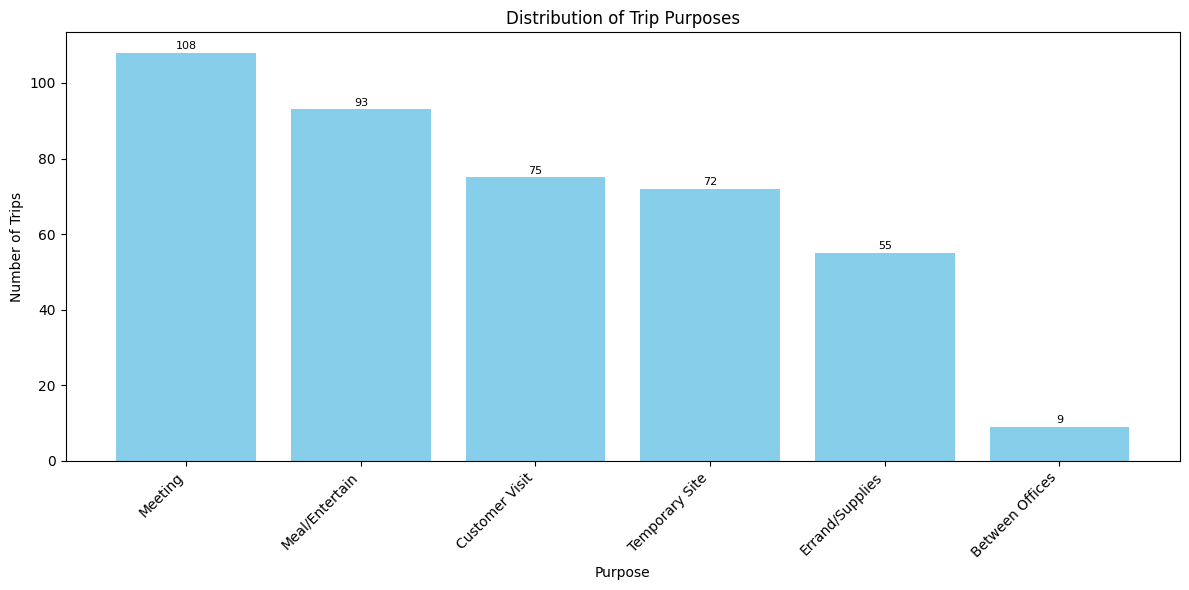

In [95]:
# Count the occurrences of each purpose
purpose_counts = uber['PURPOSE'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(purpose_counts.index, purpose_counts.values, color='skyblue')

# Set labels and title
plt.xlabel('Purpose')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trip Purposes')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add count labels on top of bars
for i, value in enumerate(purpose_counts.values):
    plt.text(i, value + 1, str(value), ha='center', fontsize=8)

plt.tight_layout()
plt.show()

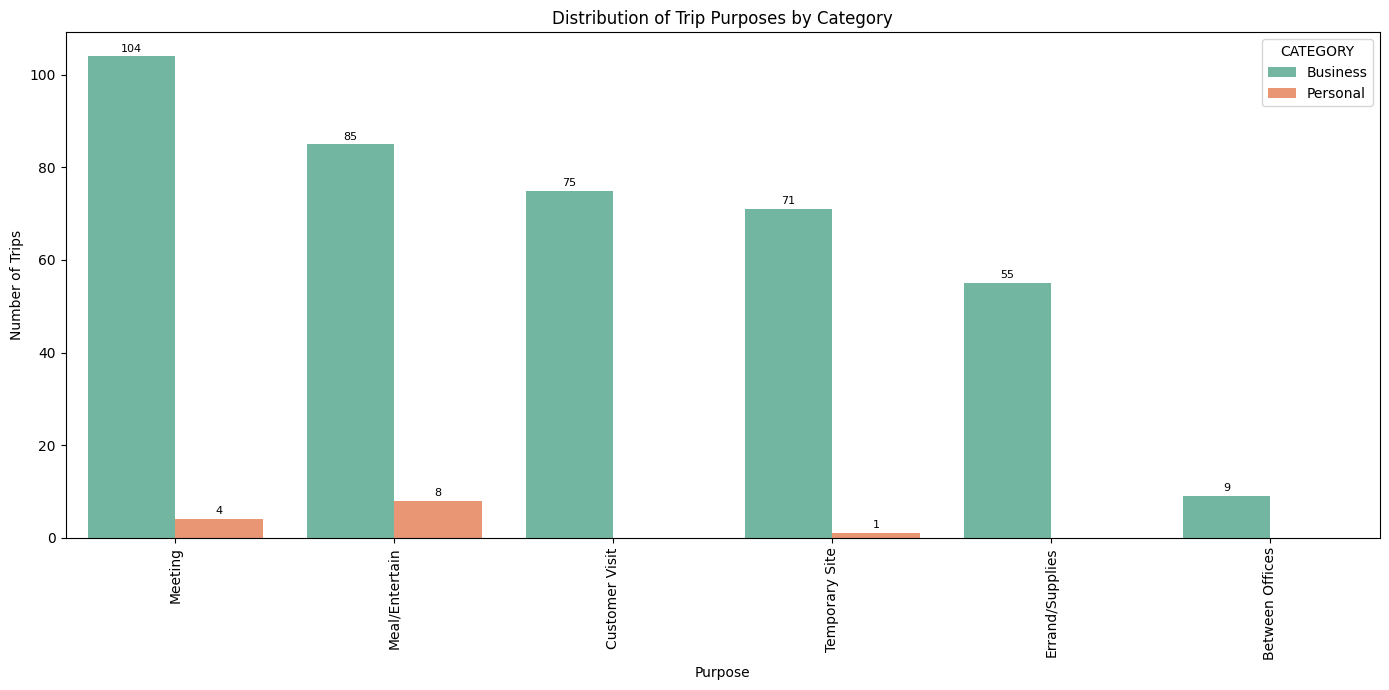

In [96]:
# Set figure size
plt.figure(figsize=(14, 7))

# Create the grouped bar plot
plot = sns.countplot(x='PURPOSE', hue='CATEGORY', data=uber,
                     order=uber['PURPOSE'].value_counts().index,
                     palette='Set2')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Titles and axis labels
plt.title('Distribution of Trip Purposes by Category')
plt.xlabel('Purpose')
plt.ylabel('Number of Trips')

# Add count labels on top of each bar
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        plot.annotate(f'{int(height)}',
                      (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom', fontsize=8, color='black',
                      xytext=(0, 2), textcoords='offset points')

plt.tight_layout()
plt.show()

### Distribution of Trip Purposes by Category

This bar chart displays how different trip purposes are distributed across categories — primarily **Business** and **Personal**.

#### Key Observations:
- The **most frequent purpose** is visible at the top left, with over **100 trips**, followed by other popular reasons such as:
  - `Meeting`, `Customer Visit`, `Meal/Entertainment`, `Errand/Supplies`, and more.
- **Bar labels** show the **exact count** for each combination of purpose and category.
- The **dominant category** for nearly every purpose is **Business**, showing that the dataset largely represents **corporate travel behavior**.
- **Personal category** appears in much fewer instances, limited to a few purposes (e.g., `Meal/Entertainment`, `Errand/Supplies`).

#### Why this is important:
- Helps stakeholders understand **why employees are traveling**.
- Useful for **policy making**, **budget allocation**, or **auditing purposes**.
- Can be used in **interactive dashboards** to filter or drill down into trip logs by purpose and category.

In [97]:
# Ensure START_DATE is datetime
#uber['START_DATE'] = pd.to_datetime(uber['START_DATE'], errors='coerce')

# Extract month names
uber['month_name'] = uber['start_date'].dt.month_name()

# Define the correct month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Count the trips by month and order them correctly
trip_trend = uber['month_name'].value_counts().reindex(month_order)

# Create the bar chart and capture the bar container
plt.figure(figsize=(14, 6))
bars = plt.bar(trip_trend.index, trip_trend.values, color='cornflowerblue')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    if not pd.isna(height):  # Avoid annotating NaN bars
        plt.text(bar.get_x() + bar.get_width() / 2, height + 1,
                 str(int(height)), ha='center', va='bottom', fontsize=10)

# Add titles and labels
plt.title('Trips per Month')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

### Monthly Trip Distribution

This chart shows how many trips occurred in each month, using January through December as the order.

#### Insights:
- The monthly distribution helps identify **seasonal travel patterns**.
- Peaks in certain months could indicate **business cycles**, **holiday seasons**, or **special events**.
- For instance, if a sharp rise is seen in months like **March or September**, it may suggest high travel demand during fiscal or academic periods.

In [ ]:
# Make sure START_DATE is datetime
#uber['START_DATE'] = pd.to_datetime(uber['START_DATE'], errors='coerce')

# Create a column for day name
uber['day_of_week'] = uber['start_date'].dt.day_name()

# Set figure size
plt.figure(figsize=(10, 6))

# Create countplot with specified order
plot = sns.countplot(
    x='day_of_week',
    data=uber,
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    palette='Pastel1'
)

# Add inner value labels
for bar in plot.patches:
    height = bar.get_height()
    plot.annotate(f'{int(height)}',
                  (bar.get_x() + bar.get_width() / 2, height + 1),
                  ha='center', va='bottom', fontsize=10)

# Add chart labels
plt.title('Trips by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()

### Weekly Trip Patterns

This chart visualizes the number of trips taken on each day of the week.

#### Insights:
- **Monday to Friday** generally see a higher number of trips, indicating strong **weekday (work-related)** usage.
- Fewer trips on **weekends** suggest limited personal use or fewer business needs.
- Such trends can help optimize **driver scheduling**, **fleet management**, or **promotional planning**.

This view is valuable for understanding **weekly demand cycles**.

In [ ]:
#Category-wise Usage by Day of the Week

# Create day_of_week column
uber['day_of_week'] = uber['start_date'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.countplot(data=uber, x='day_of_week', hue='CATEGORY', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.title('Category-wise Usage by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### Category-wise Usage by Day

This plot compares the number of **Business** vs **Personal** trips for each weekday.

#### Insights:
- Business trips dominate weekdays (Mon–Fri), especially on **Tuesdays and Thursdays**.
- Personal trips are more frequent on **weekends**, particularly **Saturdays**.
- This confirms expected behavior patterns and helps with **weekday resource allocation** and **weekend support planning**.

In [ ]:
#import matplotlib.pyplot as plt

# Group by PURPOSE and compute mean of MILES
avg_miles = uber.groupby('PURPOSE')['MILES'].mean().sort_values(ascending=False)

# Create bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(avg_miles.index, avg_miles.values, color='skyblue')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,
             f'{height:.1f}', ha='center', va='bottom', fontsize=10)

# Chart labels and title
plt.title('Average Miles per Trip by Purpose')
plt.ylabel('Average Miles')
plt.xlabel('Purpose')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Average Miles per Trip by Purpose

This bar chart illustrates the average distance (in miles) traveled for each trip purpose.

#### Insights:
- Purposes like **Customer Visit**, **Meeting**, or **Errand/Supplies** may show **longer average trip distances**.
- Internal purposes like **Office Commute** or **Training** could show shorter distances.
- Helps organizations monitor which trip types are **costlier** in terms of travel distance and possibly prioritize **remote alternatives**.

This metric can support **budget allocation** and **policy updates**.

In [ ]:
#import matplotlib.pyplot as plt

# Count trip categories
category_counts = uber['CATEGORY'].value_counts()

# Define labels
labels = category_counts.index
sizes = category_counts.values

# Custom function to show count and percent
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({count})'
    return my_autopct

# Plot
plt.figure(figsize=(6, 6))
plt.pie(sizes,
        labels=labels,
        autopct=make_autopct(sizes),
        startangle=140,
        colors=['#66b3ff', '#ff9999'],
        textprops={'fontsize': 10})

plt.title('Trip Category Proportion')
plt.axis('equal')  # Ensures pie is a circle
plt.tight_layout()
plt.show()

### Trip Category Proportion

This pie chart shows the relative share of trips categorized as **Business** or **Personal**.

#### Insights:
- The majority of trips belong to the **Business** category, reaffirming that the data is largely corporate in nature.
- A smaller share of **Personal** trips may indicate occasional personal usage or relaxed policies.
- Useful for **compliance tracking**, **expense reporting**, and **policy enforcement**.

This view highlights how organizational resources are being used.

In [ ]:
# Extract hour from START_DATE
uber['start_hour'] = uber['start_date'].dt.hour

# Create the plot
plt.figure(figsize=(12, 6))
plot = sns.histplot(uber['start_hour'], bins=24, kde=False, color='orange')

# Add value labels on top of each bar
for bar in plot.patches:
    height = bar.get_height()
    if height > 0:
        plot.annotate(f'{int(height)}',
                      (bar.get_x() + bar.get_width() / 2, height + 1),
                      ha='center', va='bottom', fontsize=9)

# Add titles and labels
plt.title('Distribution of Trips by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

### Trip Distribution by Hour of Day

This histogram represents the number of trips that start during each hour of the day (0–23).

#### Insights:
- High trip volume during **commute hours (e.g., 8–10 AM and 4–6 PM)** suggests employee travel patterns.
- Lower trip counts during late night hours show limited night-time activity.
- Ideal for optimizing **fleet availability** and **driver scheduling** based on hourly demand.

This chart is crucial for **temporal resource allocation**.

In [ ]:
#Top 5 Trip Purposes

# Count top 5 purposes
top_5_purposes = uber['PURPOSE'].value_counts().head(5)

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(top_5_purposes.index, top_5_purposes.values, color='skyblue')

# Add inner values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, str(height),
             ha='center', va='bottom', fontsize=10)

plt.title('Top 5 Most Common Trip Purposes')
plt.xlabel('Purpose')
plt.ylabel('Number of Trips')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### Top 5 Trip Purposes

This bar chart displays the five most common reasons for Uber trips.

#### Insights:
- **Customer Visit**, **Meeting**, and **Errands/Supplies** are among the most frequent purposes.
- These insights help organizations understand **business needs** and **optimize travel budgets**.

Frequent non-essential purposes may suggest areas for travel policy improvement.

## Conclusion

The Uber Rides data analysis successfully explored various aspects of ride behavior and patterns. Key findings include:

- **Trip Volume Trends:**
  - The majority of rides occurred during the **early hours of the day**, indicating business commuting and travel.
  - **January and February** had higher trip volumes, possibly due to post-holiday and early fiscal-year travel activities.

- **Trip Category Insights:**
  - **Business trips** dominated the dataset, accounting for the majority of rides.
  - Personal trips were more common during weekends, especially on **Saturdays and Sundays**.

- **Trip Purpose Patterns:**
  - Most frequent trip purposes include **Customer Visits**, **Meetings**, and **Errands/Supplies** for Business category.
  - **Meals/Entertainment** and **Commutes** were more prominent in Personal rides.

- **Trip Duration and Distance:**
  - On average, Business trips had **longer distances** and **lower speeds**, possibly due to inner-city travel or traffic delays.
  - Outliers in trip distance, duration, and speed were identified and removed using **IQR filtering** to improve analysis reliability.

- **Category and Purpose Relationship:**
  - Purpose distribution varies strongly with the trip category, as seen in side-by-side and stacked visualizations.
  - This insight can help organizations optimize ride expenses and policies.

- **Temporal Trends:**
  - Most trips were taken on **weekdays**, especially **Tuesdays and Thursdays**.
  - There is a clear pattern between **day of week** and trip type, which can support operational scheduling.

## Future Recommendations

To expand and strengthen the Uber ride analytics, the following recommendations can be considered:

1. **Incorporate Geospatial Data:**
   - Including pickup/dropoff locations (latitude & longitude) would enable map-based visualizations and route optimization.
   - Heatmaps and cluster analysis can identify high-traffic zones.

2. **Cost Analysis:**
   - If fare data is available, analyze average trip costs by purpose, category, and distance.
   - Helps in **budget forecasting** and **cost-saving initiatives**.

3. **Policy Optimization:**
   - Review overused personal trip purposes during workdays to enforce **travel policy compliance**.
   - Consider using frequent business-purpose trip patterns to **optimize vendor agreements** or **travel modes**.

4. **Time Series Forecasting:**
   - Implement time-series models (e.g., ARIMA, Prophet) to forecast future trip demands based on historical trends.

5. **Dashboard Deployment:**
   - Transform the Jupyter notebook into an interactive **Streamlit or Power BI dashboard** for real-time usage and reporting.

6. **Add Categorical Enrichment:**
   - Add user-related metadata (e.g., department, role, region) to drill deeper into **who** is taking trips and **why**.

7. **Anomaly Detection:**
   - Flag trips with abnormal speeds, durations, or roundtrips with identical start/stop points for further review.

By building on this foundation, organizations can move from simple ride logging to **data-driven mobility management**.

In [100]:
uber.to_csv('NewUberCleanData.csv', index=False)
print("Cleaned dataset saved as 'NewUberCleanData.csv'")

Cleaned dataset saved as 'NewUberCleanData.csv'


In [101]:
import os
print(os.getcwd())

C:\Users\91983\OneDrive\Desktop\UBER DA 2
